# PFRA Anomaly Report

### AAL's exceeding $3,000

---

### Contents

 - Summary of Data & Project Area Results
 - Outliers
 - Mean Values
 - Box Plots
 - AAL Heat Maps


### *STARRII*

## User inputs

In [1]:
if TRI:
    datafile = 's3://pfra/RiskAssessment/{0}/Results/TRI/AALs/Final_AAL_{0}_{1}{2}.csv'.format(project, book, TRI)
else:
    datafile = 's3://pfra/RiskAssessment/{0}/Results/AALs/Final_AAL_{0}_{1}.csv'.format(project, book)
    
# anom_threshold = 3000

In [2]:
import sys; sys.path.append('../core')
from summarize_results import *
%matplotlib inline
df = pd.read_csv(datafile)

## Summary of Data & Project Area Results

In [3]:
book = datafile.split('_')[-1].split('.')[0]
project = datafile.split('_')[-2]
gdf = df_to_gdf(df, book, project)

74,307 Uncorrelated Points for Passaic

Sum of Average Annual Losses
--------------------
Fluvial: $0
Pluvial: $659,159
Total  : $659,159


## Outliers

Identify structures where losses exceed a reasonable AAL threshold

In [4]:
anoms = gdf[gdf['TOT_AAL'] > anom_threshold].copy()
get_outlier_info(gdf, anom_threshold)  


Pluvial
--------------------
count       39.00
mean      8557.21
std       7731.49
min       3068.17
25%       3524.99
50%       4503.69
75%      12669.87
max      34031.23

Fuvial
--------------------
count    0.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0


## Mean Values

In [5]:
get_means(anoms)


All points
-------------------------
FLUV_AAL       0.00
PLUV_AAL    8557.21
TOT_AAL     8557.21


Points with AAL's > $0
-------------------------
PLUV_AAL    8557.21
FLUV_AAL        NaN
TOT_AAL     8557.21


Points with AAL's > $0 
(outliers removed)
-------------------------
PLUV_AAL   NaN
FLUV_AAL   NaN
TOT_AAL    NaN


## Medians

In [6]:
get_medians(anoms)


All points
-------------------------
FLUV_AAL       0.00
PLUV_AAL    4503.69
TOT_AAL     4503.69


Points with AAL's > $0
-------------------------
PLUV_AAL    4503.69
FLUV_AAL        NaN
TOT_AAL     4503.69


Points with AAL's > $0 
(outliers removed)
-------------------------
PLUV_AAL   NaN
FLUV_AAL   NaN
TOT_AAL    NaN


C:\Users\abrazeau\AppData\Local\Continuum\anaconda3\envs\gis\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


## Box Plots
AAL Data 


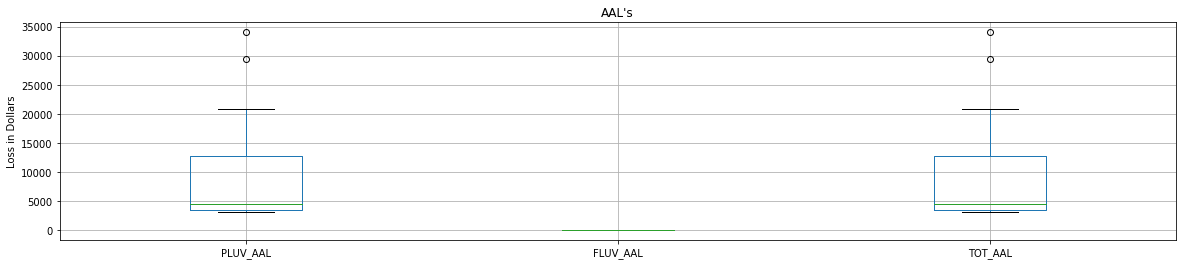

In [7]:
box_and_whisker_all(anoms)

AAL data where losses occured, with outliers removed

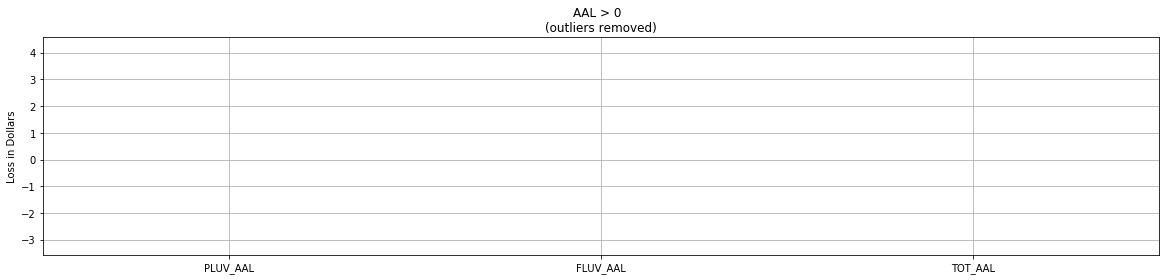

In [8]:
box_and_whisker_thresholded(anoms)    

# AAL Heat Map

---

## Pluvial

In [9]:
bds = anoms.total_bounds
location = [round(bds[[1,3]].mean(),2), round(bds[[0,2]].mean(),2)]

In [10]:
col, threshold = 'PLUV_AAL', 10
anomdata = list(zip(anoms.geometry.y, anoms.geometry.x))
m = map_aals(anoms[anoms[col] > threshold].copy() , col, 'Pluvial', location=location, zoom_start=12)

for point in range(0, len(anomdata)):
    if int(anoms['PLUV_AAL'].iloc[point]) > 3000:  
        folium.Marker(anomdata[point], popup='${:,}'.format(int(anoms['TOT_AAL'].iloc[point]))).add_to(m)
    
m

# AAL Heat Map

---

## Fluvial 

In [11]:
col, threshold = 'FLUV_AAL', 10
anomdata = list(zip(anoms.geometry.y, anoms.geometry.x))
try:
    m = map_aals(anoms[anoms[col] > threshold].copy() , col, 'Fluvial', location=location, zoom_start=12)
    for point in range(0, len(anomdata)):
        if int(anoms['FLUV_AAL'].iloc[point]) > 3000:  
            folium.Marker(anomdata[point], popup='${:,}'.format(anoms['FLUV_AAL'].iloc[point])).add_to(m)
except ValueError as e:
    m = None
    print(e)
    print('No Fluvial Outliers!')

m

# END